In [93]:
import numpy as np
import matplotlib.pyplot as plt
import gtd2d.runner.flow_utils as flow
from scipy.signal import savgol_filter


In [126]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/shapes/"

In [127]:
gt = np.loadtxt(path + dataset + "groundtruth.txt")
# gt[:,[1, 2, 3]] = gt[:,[1, 3, 2]]
# gt[:, 1] = savgol_filter(gt[:, 1], 51, 3)
# gt[:, 2] = savgol_filter(gt[:, 2], 51, 3)
# gt[:, 3] = savgol_filter(gt[:, 3], 51, 3)
# np.savetxt(path+dataset+"groundtruth2.txt", gt)

In [128]:
imu = np.loadtxt(path + dataset + "imu.txt")

In [129]:
# imu[:, 3] -= 0.981
print(imu.shape)
print(gt.shape)
# np.savetxt(path + dataset + "imu2.txt", imu, fmt="%.9f %.9f %.9f %.9f %.9f %.9f %.9f")

(59620, 7)
(11947, 8)


In [130]:
imu_txyz = imu[:, :4]
# imu_txyz[:,2] += 9.81
print(imu_txyz[:, 2].mean())

-10.052000213185071


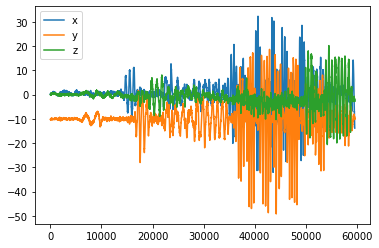

In [131]:
h = -1
l = 0
# imu_txyz[:, 1] = savgol_filter(imu_txyz[:, 1], 500, 2)
# imu_txyz[:, 2] = savgol_filter(imu_txyz[:, 2], 500, 2)
# imu_txyz[:, 3] = savgol_filter(imu_txyz[:, 3], 500, 2)
plt.plot(imu_txyz[l:h, 1], label="x")
plt.plot(imu_txyz[l:h, 2], label="y")
plt.plot(imu_txyz[l:h, 3], label="z")
plt.legend()

In [132]:
gt_txyz = gt[:, :4]
gt_txyz -= gt_txyz[0]

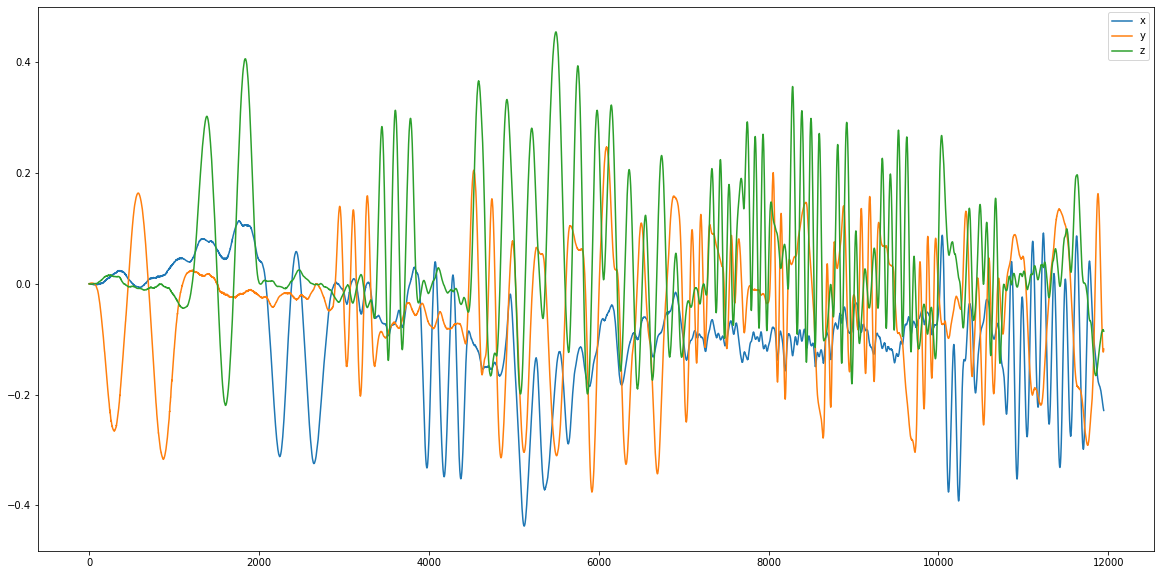

In [133]:
plt.figure(figsize=(20, 10))
plt.plot(gt_txyz[:, 1], label="x")
plt.plot(gt_txyz[:, 2], label="y")
plt.plot(gt_txyz[:, 3], label="z")
plt.legend()

In [119]:
from scipy.signal import savgol_filter
# gt_txyz[:, 1] = savgol_filter(gt_txyz[:, 1], 51, 3)
# gt_txyz[:, 2] = savgol_filter(gt_txyz[:, 2], 51, 3)
# gt_txyz[:, 3] = savgol_filter(gt_txyz[:, 3], 51, 3)

In [120]:
gt_a = gt[:, 4:]
# gt_a -= gt_a[0]
print(gt_a.shape)

(25095, 4)


In [121]:
from scipy.spatial.transform import Rotation as R

gt_a_euler = np.zeros((gt_a.shape[0]-1, 3))

for i, r in enumerate(gt_a[1: :]):
    r_q = R.from_quat(r)
    gt_a_euler[i] = r_q.as_euler("xyz", degrees=False)
    
gt_a_euler[:, 0] = savgol_filter(gt_a_euler[:, 0], 51, 3)
gt_a_euler[:, 1] = savgol_filter(gt_a_euler[:, 1], 51, 3)
gt_a_euler[:, 2] = savgol_filter(gt_a_euler[:, 2], 51, 3)
    
gt_a_euler[:, 0] = np.unwrap(gt_a_euler[:, 0])
gt_a_euler[:, 1] = np.unwrap(gt_a_euler[:, 1])
gt_a_euler[:, 2] = np.unwrap(gt_a_euler[:, 2])

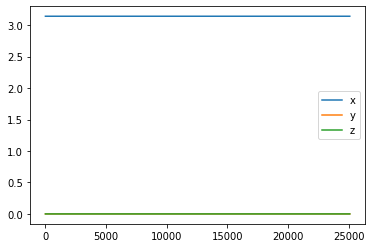

In [122]:
plt.plot(gt_a_euler[:, 0], label="x")
plt.plot(gt_a_euler[:, 1], label="y")
plt.plot(gt_a_euler[:, 2], label="z")
plt.legend()
# print(gt[5450, 0])

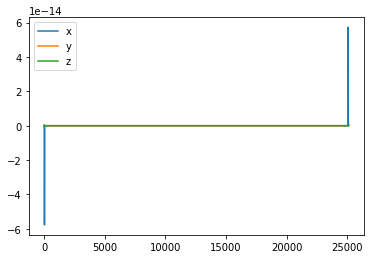

In [123]:
a = 1
vel_a = (gt_a_euler[a:,:] - gt_a_euler[:-a, :]) #/ (gt_txyz[a+1:,0] - gt_txyz[:-a,0])[:,None]
l = 0
h = -1
plt.plot(vel_a[l:h, 0], label="x")
plt.plot(vel_a[l:h, 1], label="y")
plt.plot(vel_a[l:h, 2], label="z")
plt.legend()

In [124]:
a = 1
vel_xyz_gt = (gt_txyz[a:,1:] - gt_txyz[:-a, 1:]) / (gt_txyz[a:,0] - gt_txyz[:-a,0])[:,None]
vel_xyz_gt[:, 2] = np.abs(vel_xyz_gt[:, 2])

0
-1


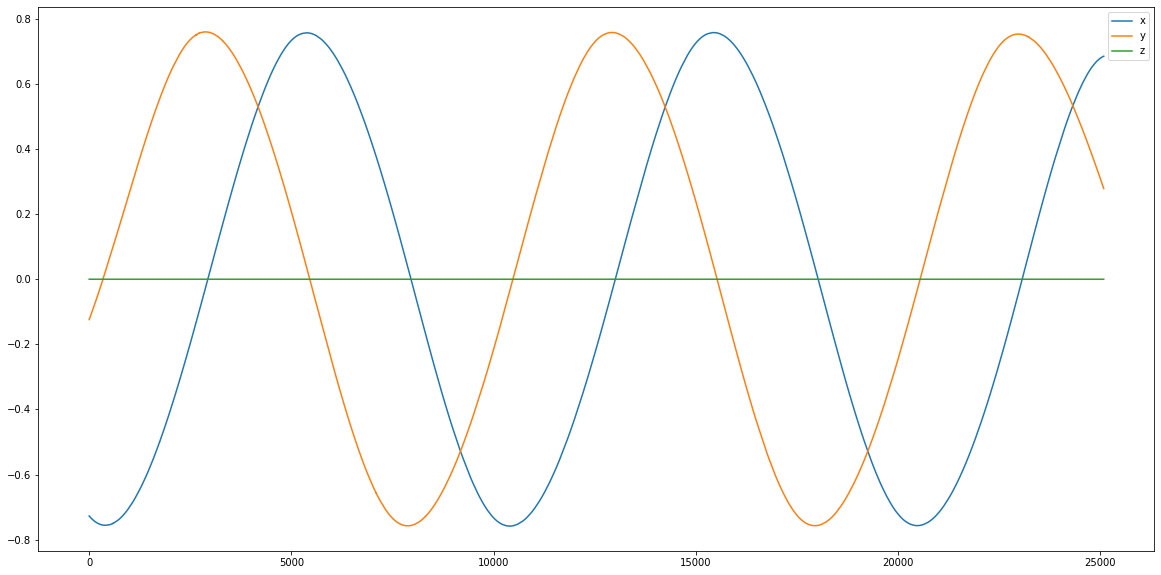

In [125]:
plt.figure(figsize=(20, 10))
h_l = 0#np.searchsorted(gt_txyz[:, 0], 0.0)
h = -1 #np.searchsorted(gt_txyz[:, 0], 5)
print(h_l)
print(h)
plt.plot(vel_xyz_gt[h_l:h, 0], label="x")
plt.plot(vel_xyz_gt[h_l:h, 1], label="y")
plt.plot(vel_xyz_gt[h_l:h, 2], label="z")
plt.legend()

In [109]:
plt.figure(figsize=(20, 10))
h = np.searchsorted(imu_txyz[:, 0], 15.0)
h_l = np.searchsorted(imu_txyz[:, 0], 2.0)
print(h_l)
print(h)
plt.plot(imu_txyz[h_l:h, 1], label="x")
plt.plot(imu_txyz[h_l:h, 2], label="y")
plt.plot(imu_txyz[h_l:h, 3], label="z")
plt.legend()

NameError: name 'imu_txyz' is not defined

<Figure size 1440x720 with 0 Axes>

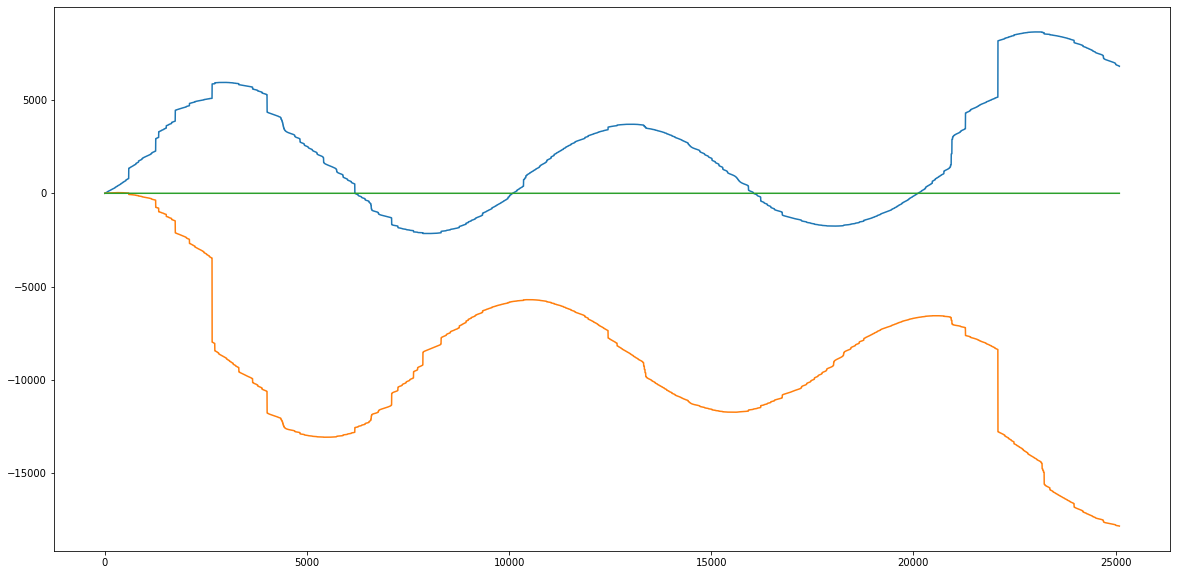

In [110]:
plt.figure(figsize=(20, 10))
pos_xyz_gt_rec = np.cumsum(np.negative(vel_xyz_gt), axis=0)
plt.plot(pos_xyz_gt_rec[:, 0])
plt.plot(pos_xyz_gt_rec[:, 1])
plt.plot(pos_xyz_gt_rec[:, 2])
gt_txyz[1:, 1:] = pos_xyz_gt_rec[:]

In [106]:
dt = (time[-1] - time[0]) / imu.shape[0]
initial_vel = [0, 0, 0]
time = imu[:, 0] - imu[0, 0]
dts = time[1:] - time[:-1]
test = imu_txyz[:,1:] * dt * 10
imu_xyz_init = np.vstack([initial_vel, test])

In [107]:
gt[1:, 3] = pos_xyz_gt_rec[:, 2]

In [108]:
vel_xyz_imu = np.cumsum(imu_xyz_init, axis=0)

In [109]:
# print(imu[:100, :2])

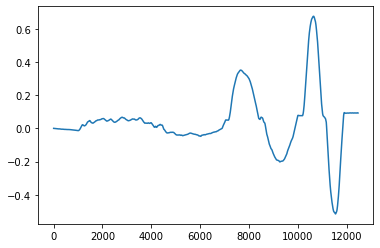

In [110]:
plt.plot(vel_xyz_imu[:, 0])
# plt.plot(vel_xyz_imu[:, 1])
# plt.plot(vel_xyz_imu[:, 2])

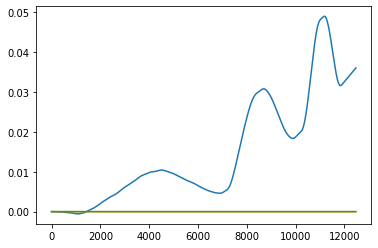

In [28]:
pos_xyz_imu_rec = np.cumsum(vel_xyz_imu * 0.001, axis=0)
plt.plot(pos_xyz_imu_rec[:, 0])
plt.plot(pos_xyz_imu_rec[:, 1])
plt.plot(pos_xyz_imu_rec[:, 2])

In [22]:
vel_xyz_gt.shape

(11958, 3)

In [23]:
imu_txyz.shape

(59707, 4)

In [24]:
diff = np.zeros_like(imu_txyz[:,1:])

In [25]:
for i, t in enumerate(imu_txyz[:,0]):
    imu_vel = vel_xyz_imu[i]
    gt_idx = np.searchsorted(gt[100:,0], t)
    gt_vel = vel_xyz_gt[gt_idx]
    diff[i] = imu_vel - gt_vel

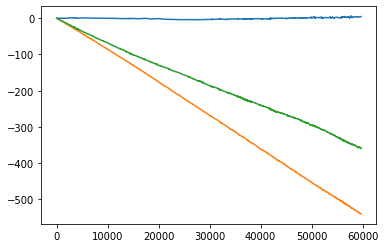

In [26]:
plt.plot(diff[:, 0])
plt.plot(diff[:, 1])
plt.plot(diff[:, 2])

In [27]:
diff[1000:,0].mean()

-0.6714687814078847

In [28]:
t

59.819786999

In [29]:
t[[0,1]] = t[[1, 0]]

IndexError: invalid index to scalar variable.

In [ ]:
(gt[1:, 0] - gt[:-1, 0]).mean()

In [ ]:
(imu[1:, 0] - imu[:-1, 0]).mean()

In [162]:
import gtd2d.runner.flow_utils as utils

In [163]:
print(utils.vel_at_time(gt, 26.9, imu=False))

[ 2.69000000e+01  2.52323025e-02  1.37315268e-01 -3.75431571e-01
 -4.73924135e-02 -4.67702273e-02  9.76403506e-01]


In [164]:
print(utils.vel_at_time(np.c_[imu[:, 0], vel_xyz_imu[1:]], 2.0, imu=True))

NameError: name 'vel_xyz_imu' is not defined

In [203]:
vel = flow.vel_at_time_gt(gt, 27.7)
# vel[2] = 0
print(vel)

[ 2.77000000e+01  4.12106859e-03  6.37268133e-02 -2.20065165e-01
 -1.92696762e-02 -4.14162280e-01 -3.25930082e-02]


In [204]:
at = flow.get_translational_flow(vel[1:4], 199.37, [120, 90], (180, 240))

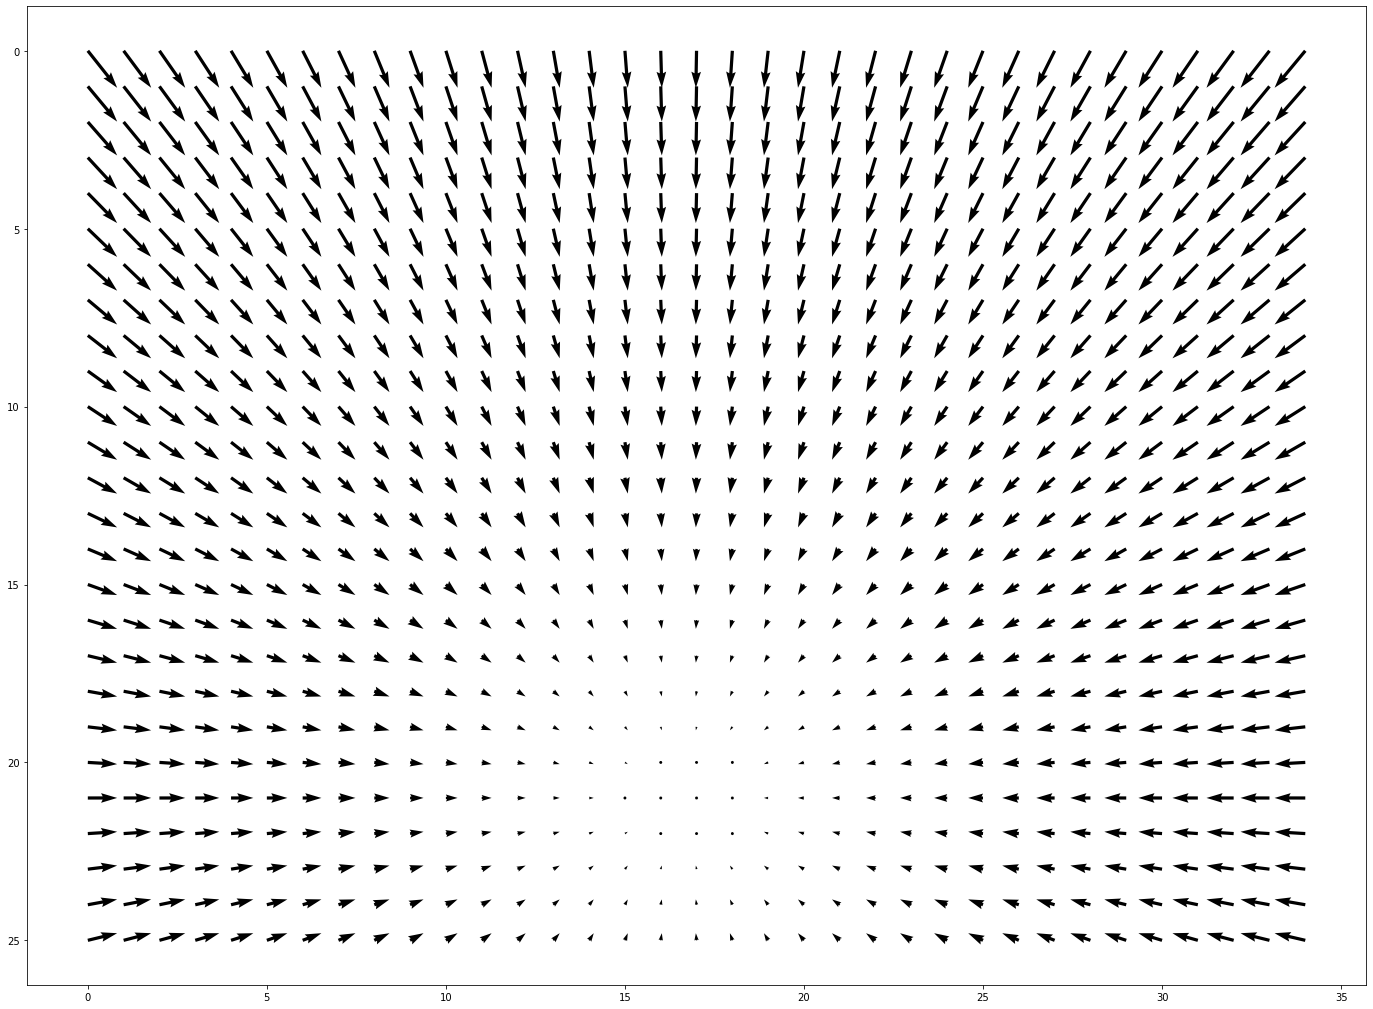

In [205]:
plt.figure(figsize=(24, 18))
plt.quiver(at[0][::7, ::7], at[1][::7, ::7])
plt.gca().invert_yaxis()

In [206]:
wt = flow.get_angular_flow(vel[4:], 199.37, [120, 90], (180, 240))

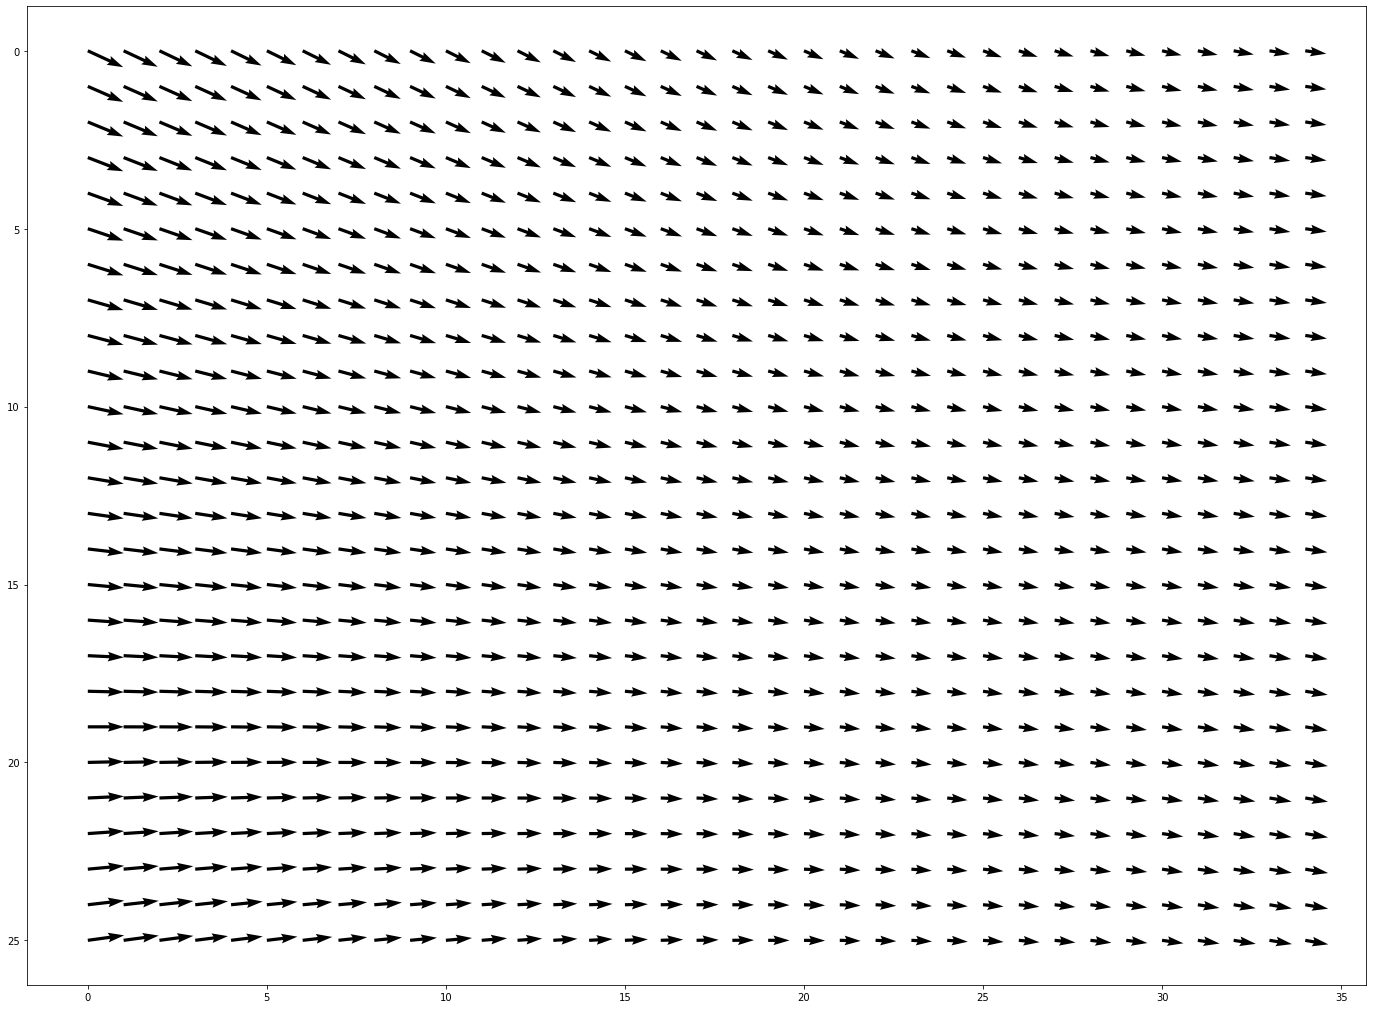

In [207]:
plt.figure(figsize=(24, 18))
plt.quiver(wt[0][::7, ::7] + at[0][::7, ::7], wt[1][::7, ::7] + at[1][::7, ::7])
plt.gca().invert_yaxis()

In [59]:
imu_txyz.shape

(59707, 4)

In [75]:
from scipy import integrate


In [80]:
x = integrate.cumtrapz(imu_txyz[:, 1], imu_txyz[:, 0])
y = integrate.cumtrapz(imu_txyz[:, 2], imu_txyz[:, 0])
z = integrate.cumtrapz(imu_txyz[:, 3], imu_txyz[:, 0])

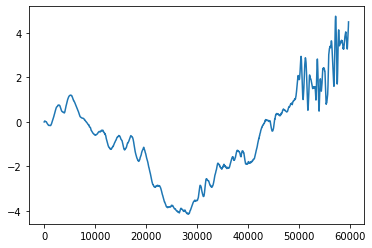

In [87]:
plt.plot(x)
# plt.plot(y)
# plt.plot(z)